# Sistema de agrupacion de casas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [3]:
# Cargamos el data set
ruta = r"../data/raw/housing.csv"
df = pd.read_csv(ruta, sep=",")

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,4


In [5]:
# Seleciionamos columnas importantes que nos da el ejercicio
selected_columns = ['Latitude', 'Longitude', 'MedInc']
X = df[selected_columns]

In [6]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Aplicamos PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

In [8]:
# Convertir a Dataframe
df_pca = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])

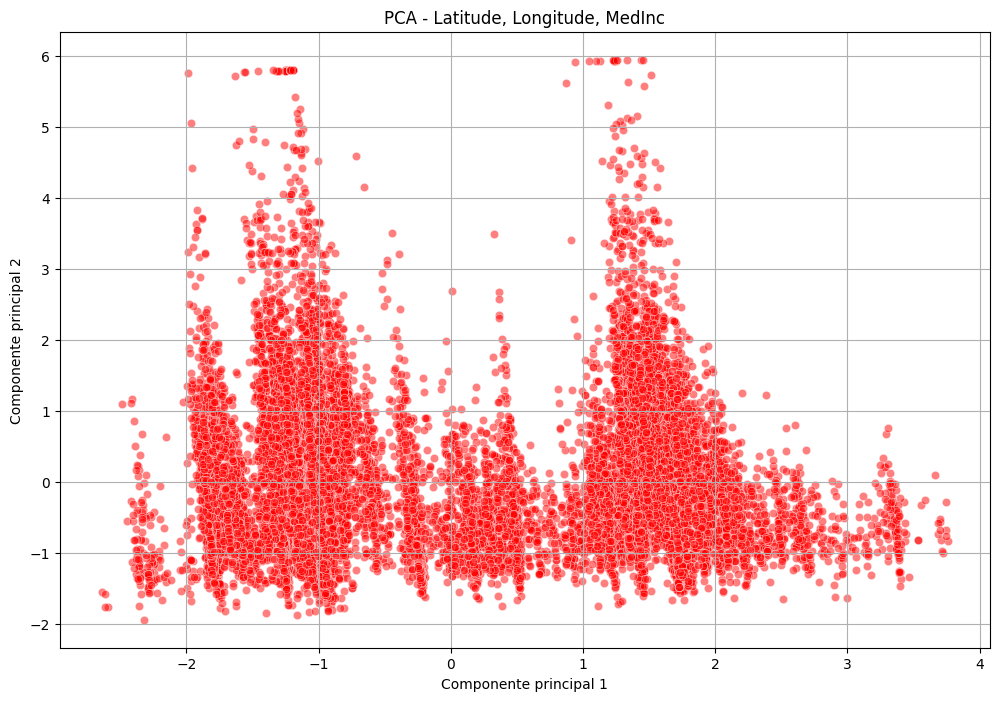

In [9]:
# Visualizar los resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.5, color='red')
plt.title("PCA - Latitude, Longitude, MedInc")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

## Clasificamos los datos en 6 Clusters utilizndo K-means

In [10]:
# K-means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=18)
clusters = kmeans.fit_predict(x_pca)

In [11]:
# Añadimos al dataframe original
df['cluster'] = pd.Series(clusters).astype('category')

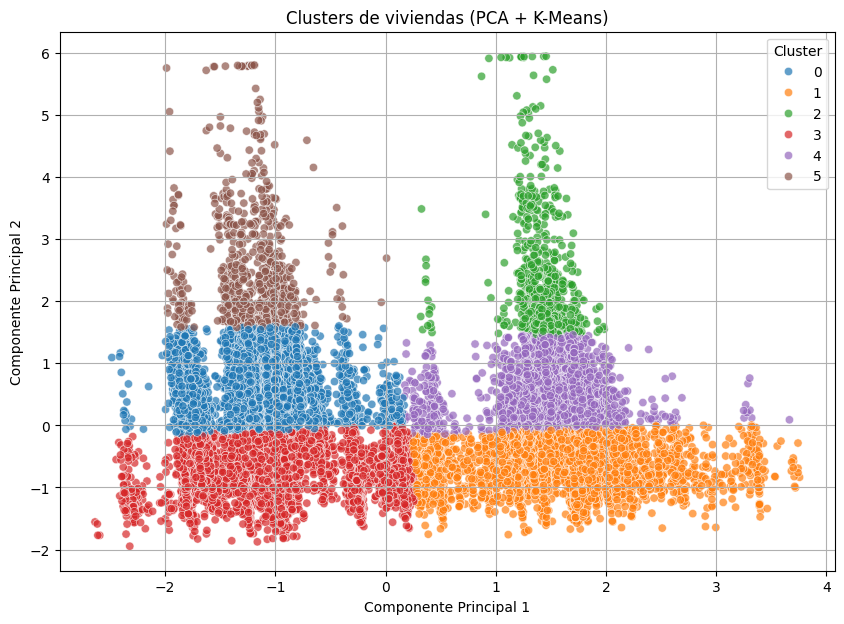

In [12]:
# graficamos para visualizarlo mejor
plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df['cluster'], palette='tab10', alpha=0.7)
plt.title("Clusters de viviendas (PCA + K-Means)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

El gráfico muestra cómo las viviendas se agrupan en 6 clusters distintos en el espacio PCA.

In [13]:
# División en train/test
X_train, X_test = train_test_split(X,
                                   test_size=0.2,
                                   random_state=42
)

In [14]:
# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# PCA (entrenar con train y transformar ambos)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [16]:
# KMeans (entrenar con train)
kmeans = KMeans(n_clusters=6, random_state=42)
train_clusters = kmeans.fit_predict(X_train_pca)

In [17]:
# Predecir en test
test_clusters = kmeans.predict(X_test_pca)

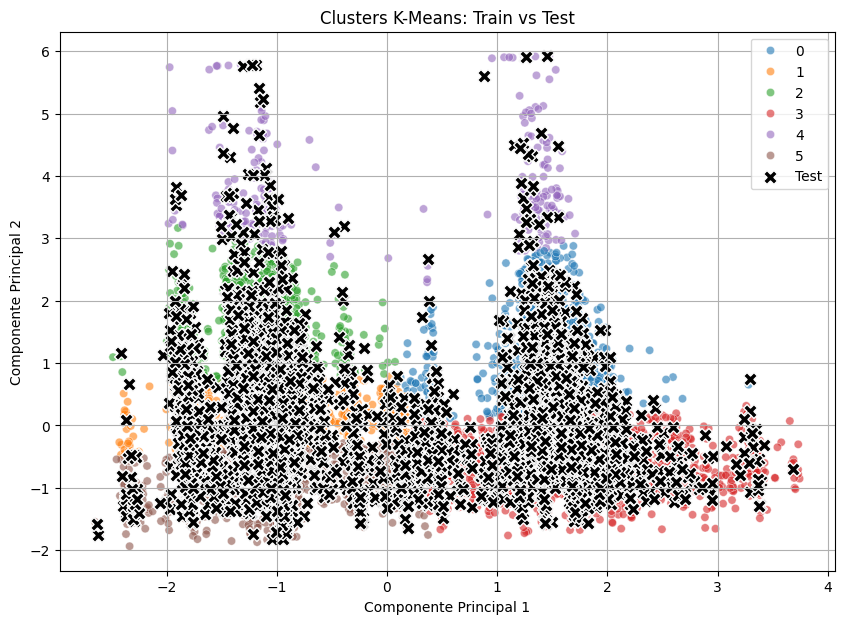

In [18]:
plt.figure(figsize=(10, 7))

# Train points (clustered y con color por cluster)
sns.scatterplot(
    x=X_train_pca[:, 0], y=X_train_pca[:, 1],
    hue=train_clusters, palette='tab10', alpha=0.6
)

# Test points (destacados en negro con borde blanco)
plt.scatter(
    X_test_pca[:, 0], X_test_pca[:, 1],
    c='black', edgecolor='white', marker='X', s=100, label='Test'
)

plt.title("Clusters K-Means: Train vs Test")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()

### Observaciones:
> - Que están agrupados visualmente, por lo que significa que K-Means encontró patrones reales y bien diferenciados en los datos.
> - Si hay mucha mezcla de colores, el clustering no separó tan bien.
> - Si los puntos negros (con forma de X) caen dentro de las regiones de color homogéneo, significa que el modelo está generalizando bien sobre datos nuevos.
> - Si muchos puntos X aparecen en zonas donde no hay puntos similares del train set, eso puede indicar mala generalización.
## Conclusion:
> Qué formas tienen los clusters en tu espacio de datos reducido (PCA).
> Si los datos de prueba caen dentro de esas regiones aprendidas por K-Means.
## Como saber si el modelo funciona bien:
>> - Si los puntos de cada color están juntos y no muy mezclados, eso es buena señal: el modelo agrupó bien las viviendas.
>> - Si los puntos negros (test) caen dentro o cerca de los grupos de colores, significa que el modelo puede predecir bien en datos nuevos.

In [19]:
# Guardamos todos loe archivos en sus respectivas carpetas
joblib.dump(kmeans, r"../models/kmeans.pkl")
joblib.dump(scaler, r"../models/scaler.pkl")
joblib.dump(pca, r"../models/pca.pkl")
joblib.dump(X_scaled, r"../models/scaler.pkl")
joblib.dump(clusters, r"../models/clusters.pkl")
joblib.dump(x_pca, r"../models/pca.pkl")

df.to_csv(r"../data/raw/housing.csv", index=False)
df_pca.to_csv(r"../data/raw/pca.csv", index=False)

joblib.dump(X_train, r"../data/processed/X_train.csv")
joblib.dump(X_test, r"../data/processed/X_test.csv")
joblib.dump(X_test_pca, r"../data/processed/X_test_pca.csv")
joblib.dump(X_test_scaled, r"../data/processed/X_test_scaled.csv")
joblib.dump(X_train_pca, r"../data/processed/X_train_pca.csv")
joblib.dump(X_train_scaled,r"../data/processed/X_train_scaled.csv")
joblib.dump(train_clusters, r"../data/processed/train_clusters.csv")
joblib.dump(test_clusters, r"../data/processed/test_clusters.csv")


['../data/processed/test_clusters.csv']